In [34]:
import pandas as pd
import numpy as np

In [35]:
df=pd.read_csv("insurance charge.csv")
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
df.head(10)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
5,5,31,female,25.740,0,no,southeast,3756.62160
6,6,46,female,33.440,1,no,southeast,8240.58960
7,7,37,female,27.740,3,no,northwest,7281.50560
8,8,37,male,29.830,2,no,northeast,6406.41070
9,9,60,female,25.840,0,no,northwest,28923.13692


In [37]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [40]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [41]:
df.describe(include= "object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

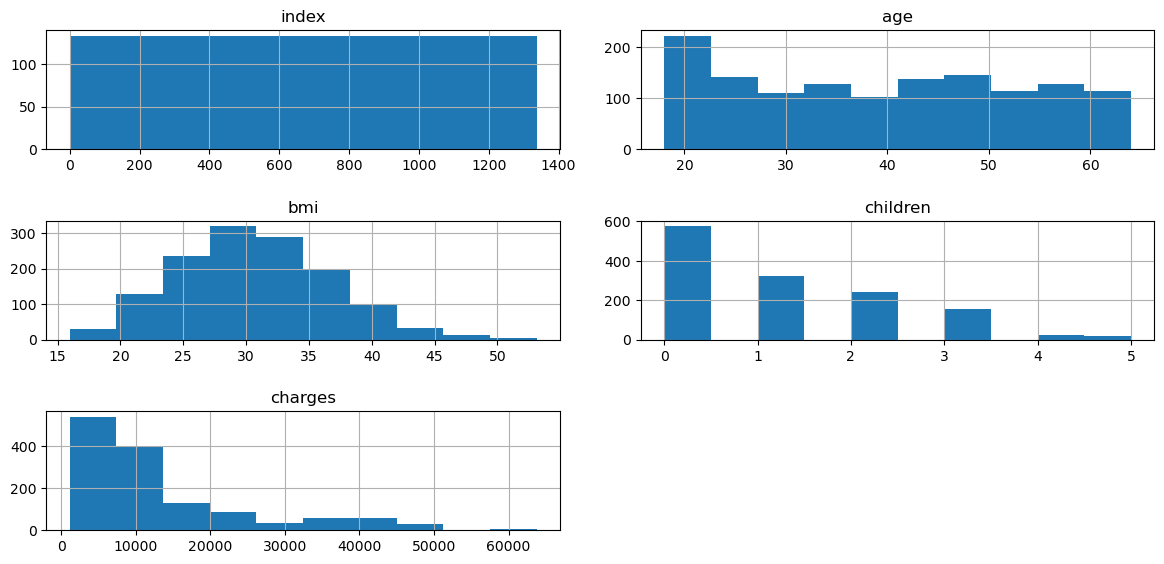

In [43]:
df.hist(figsize=(12, 6))
plt.tight_layout(pad=2.0) 
plt.show()

In [44]:
df= df.drop(columns=['index'])

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


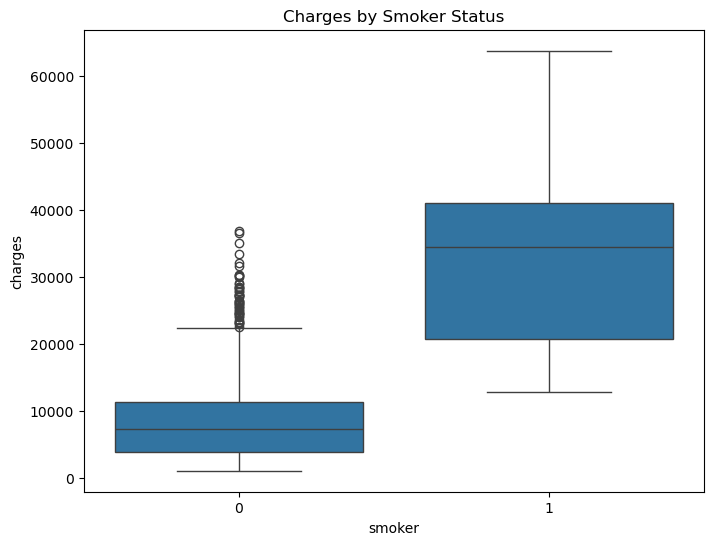

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker',y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()

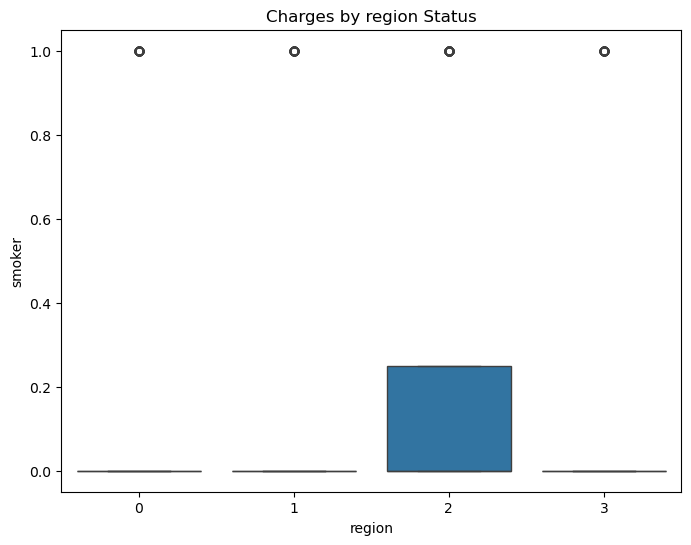

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='smoker', data=df)
plt.title("Charges by region Status")
plt.show()

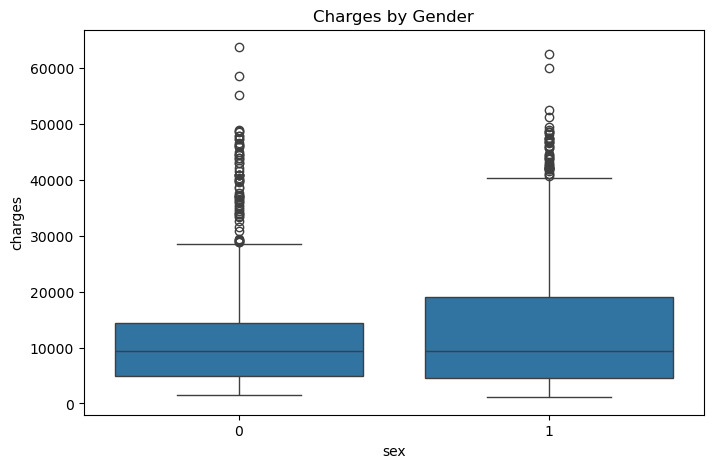

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Gender")
plt.show()

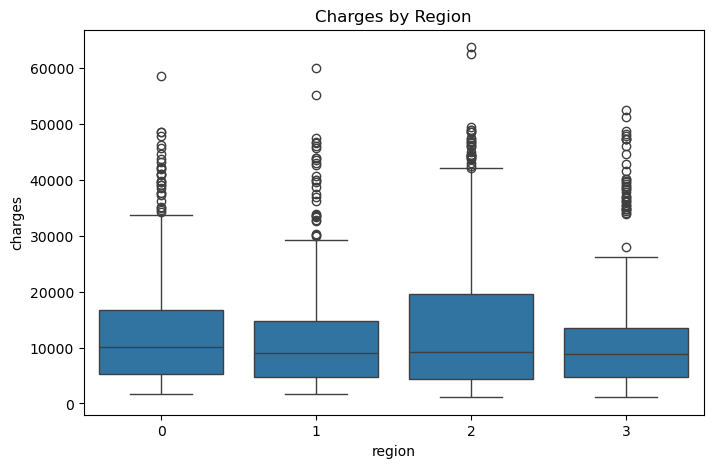

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.show()

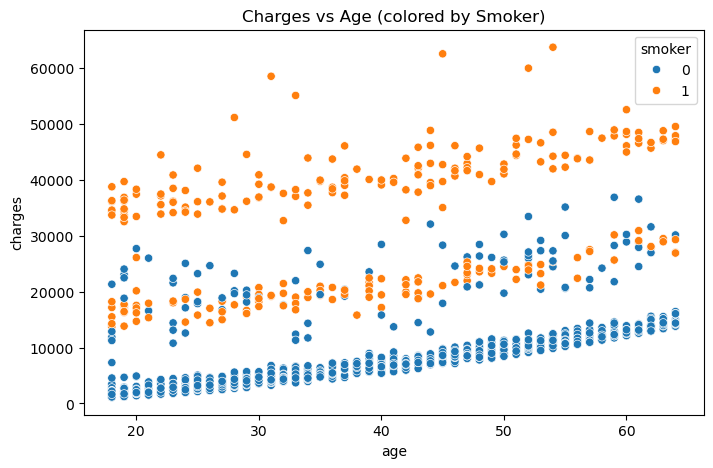

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age (colored by Smoker)")
plt.show()

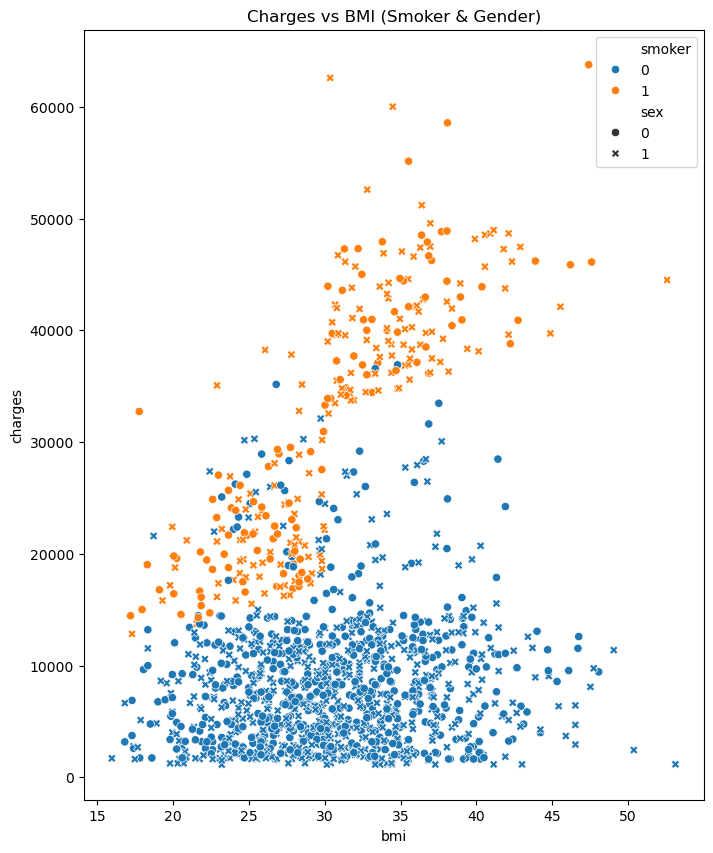

In [54]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='bmi', y='charges', hue='smoker', style='sex', data=df)
plt.title("Charges vs BMI (Smoker & Gender)")
plt.show()

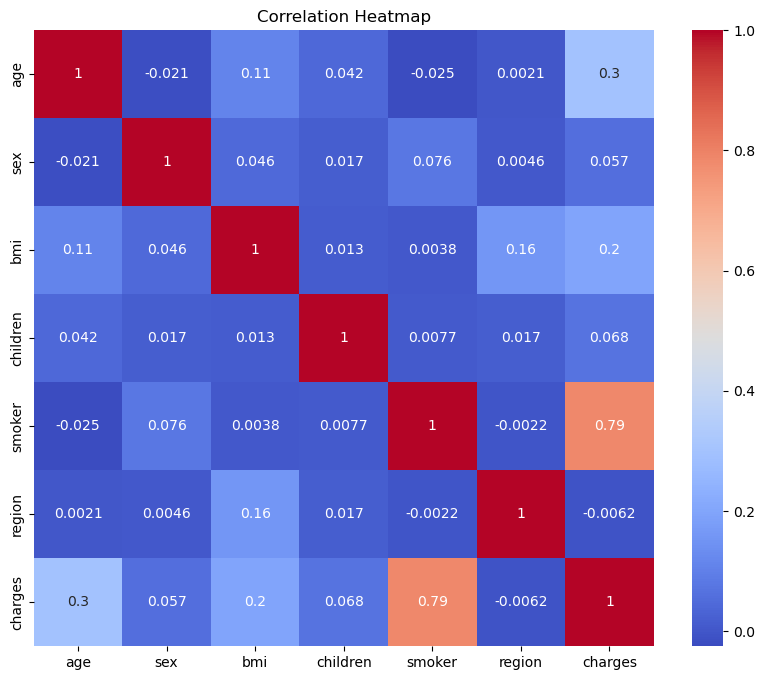

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

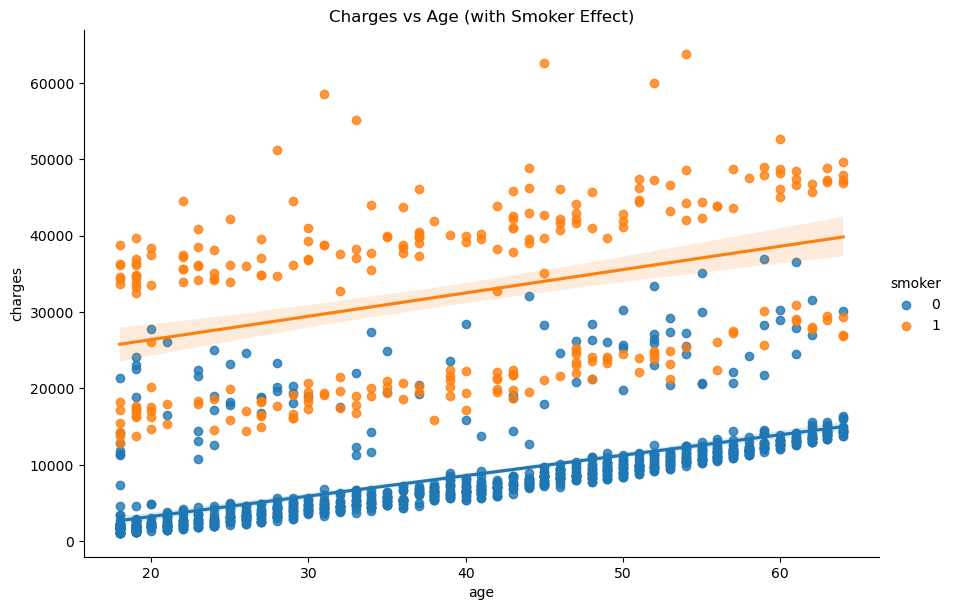

In [56]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=6, aspect=1.5)
plt.title("Charges vs Age (with Smoker Effect)")
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges'])
y = df['charges']

In [58]:
X_train, X_test, y_train, y_test = train_test_split (                                
    X, y, test_size=0.2, random_state=42
)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy (approx): {accuracy:.2f}%")

MAE: 4186.51
RMSE: 5799.59
R² Score: 0.78
MAPE: 47.09%
Accuracy (approx): 52.91%


In [60]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    accuracy = 100 - mape

    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape,
        "Accuracy(approx)": accuracy
    }

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="R2", ascending=False))

                           MAE         RMSE        R2       MAPE  \
Gradient Boosting  2447.951558  4352.538932  0.877973  29.248172   
Random Forest      2533.674644  4590.573539  0.864261  30.286630   
Linear Regression  4186.508898  5799.587091  0.783346  47.093030   
Lasso Regression   4186.516277  5799.590642  0.783346  47.093241   
Ridge Regression   4198.141005  5803.084710  0.783085  47.319676   
Decision Tree      3154.705669  7000.231682  0.684357  34.972727   

                   Accuracy(approx)  
Gradient Boosting         70.751828  
Random Forest             69.713370  
Linear Regression         52.906970  
Lasso Regression          52.906759  
Ridge Regression          52.680324  
Decision Tree             65.027273  


In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF R²:", rf_grid.best_score_)


gb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

gb_grid = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=5,
    scoring='r2',
    n_iter=10,
    n_jobs=-1,
    random_state=42
)
gb_grid.fit(X_train, y_train)
print("Best GB Params:", gb_grid.best_params_)
print("Best GB R²:", gb_grid.best_score_)

Best RF Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best RF R²: 0.8454252622447627
Best GB Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
Best GB R²: 0.8472473464134342


In [62]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)

model = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.87625594 0.88784333 0.86688101 0.8528529  0.93501577 0.86150577
 0.83149486 0.77345842 0.82543588 0.86781171]
Mean R²: 0.8578555591279102


Feature Importance:
    feature  importance
4    smoker    0.689619
2       bmi    0.182230
0       age    0.117018
3  children    0.008222
5    region    0.002466
1       sex    0.000446


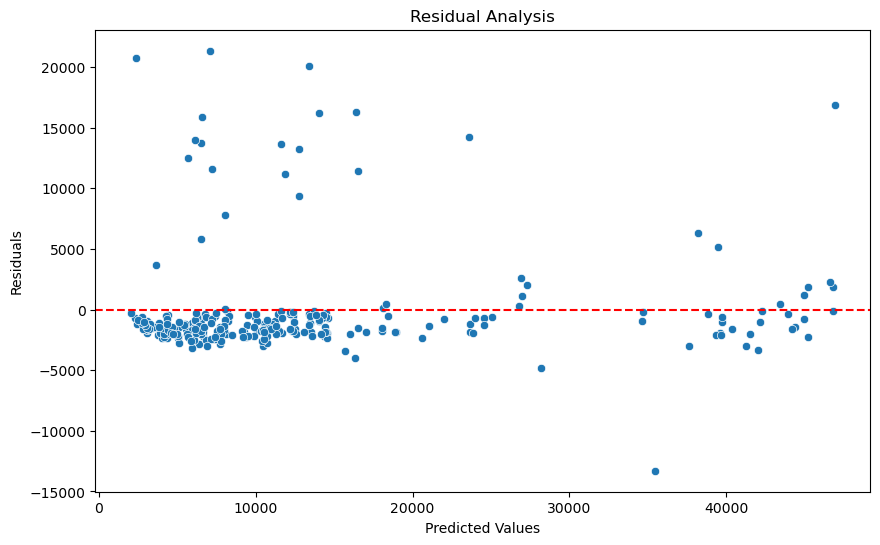

In [63]:
best_model = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
best_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
residuals = y_test - best_model.predict(X_test)
sns.scatterplot(x=best_model.predict(X_test), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [64]:
import joblib
joblib.dump(best_model, "gradient_boosting_model.pkl")
print("Best model saved as gradient_boosting_model.pkl")
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")

Best model saved as gradient_boosting_model.pkl


['feature_names.pkl']

In [66]:
import sklearn
print(sklearn.__version__)
print(joblib.__version__)

1.5.1
1.4.2
